In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

##Load the data to Python Environment

In [47]:
df=pd.read_csv('/content/Employee.csv')
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


##Information of data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

***There are 8 numerical features (2 float and 6 integer) and 16 categorical features in this data.***

##Check Statistical Summary

In [49]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


***This is the statistical Summary of the data***

##Check for Duplicates

In [50]:
df.duplicated().sum()

0

***There are no duplicates in this data***

##Check for null values

In [51]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

***There are null values present in the columns 'Work-Life Balance','Performance Rating','Number of Promotions','Education Level','Marital Status','Number of Dependents','Job Level','Company Size','Remote Work','Employee Recognition'.***

##Exploratory Data Analysis

##Check For Outliers

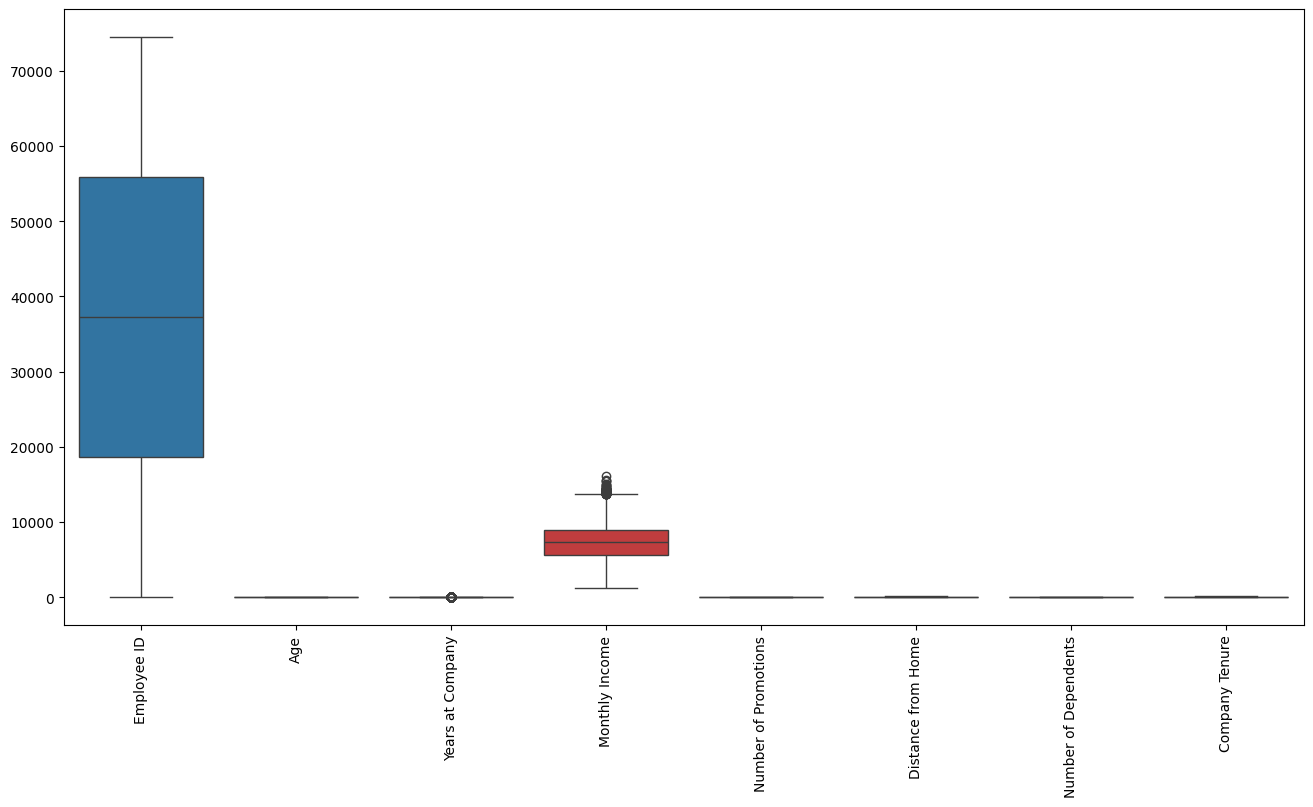

In [52]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***Outiliers are present in 'Years at Company' and 'Monthly Income'.***

In [53]:
def percentage_with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)

def percentage_without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

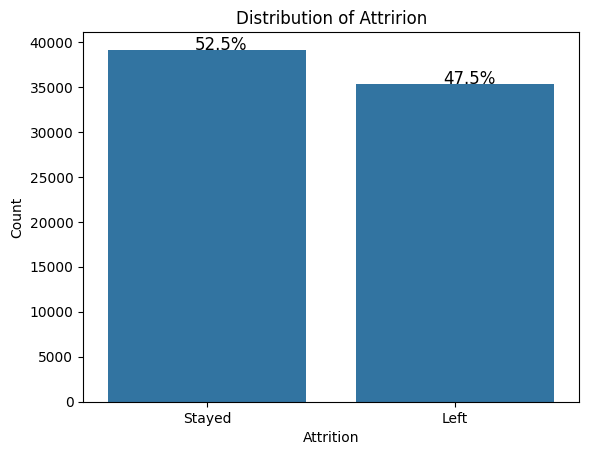

In [54]:
ax=sns.countplot(x='Attrition',data=df)
plt.title('Distribution of Attririon')
plt.xlabel('Attrition')
plt.ylabel('Count')
percentage_without_hue(ax, df['Attrition'])
plt.show()

***Our data is not Imbalanced.53% of Employees Stayed and 47% of Employees Left***



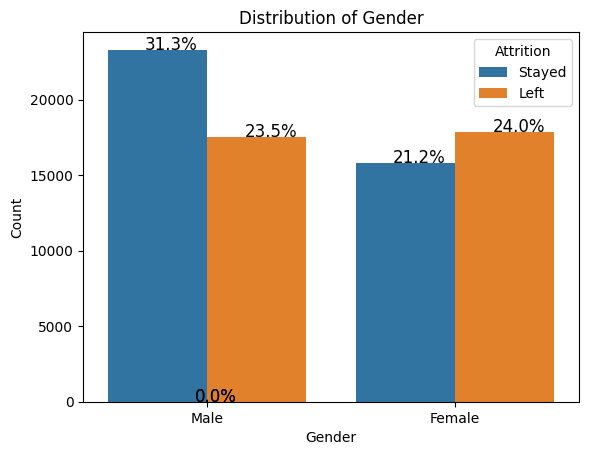

In [55]:
ax=sns.countplot(x='Gender',data=df,hue='Attrition')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
percentage_without_hue(ax, df.Gender)
plt.show()

***31% of Male and 21% of Female stayed.23% of Male and 24% of Female left.Alao More number of Employees are Male.***

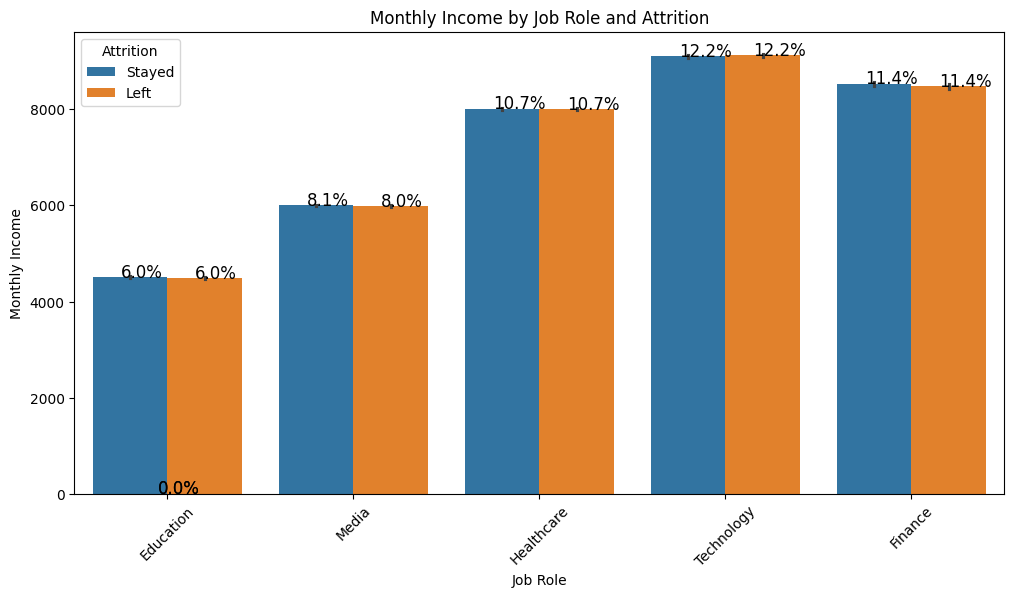

In [56]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Job Role', y='Monthly Income', hue='Attrition', data=df)
plt.xticks(rotation=45)
plt.title('Monthly Income by Job Role and Attrition')
percentage_without_hue(ax, df['Job Role'])
plt.show()

***Monthly income is high for Employees working in Technology and Monthly income is low for Employees working in Education.***

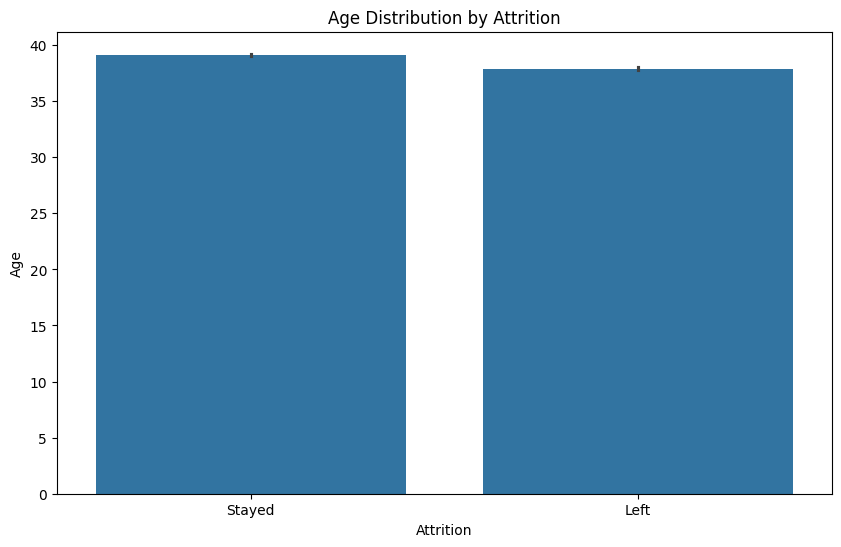

In [57]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.show()

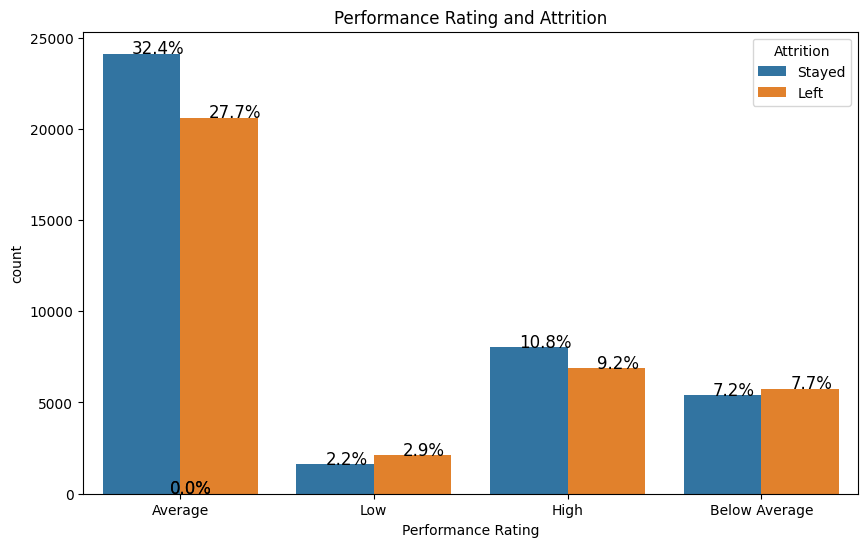

In [58]:
# Performance Rating and Attrition
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Performance Rating', hue='Attrition', data=df)
plt.title('Performance Rating and Attrition')
percentage_without_hue(ax, df['Performance Rating'])
plt.show()

***Employees with Average Performance Rating (32%) are more than others.***

##Correlation

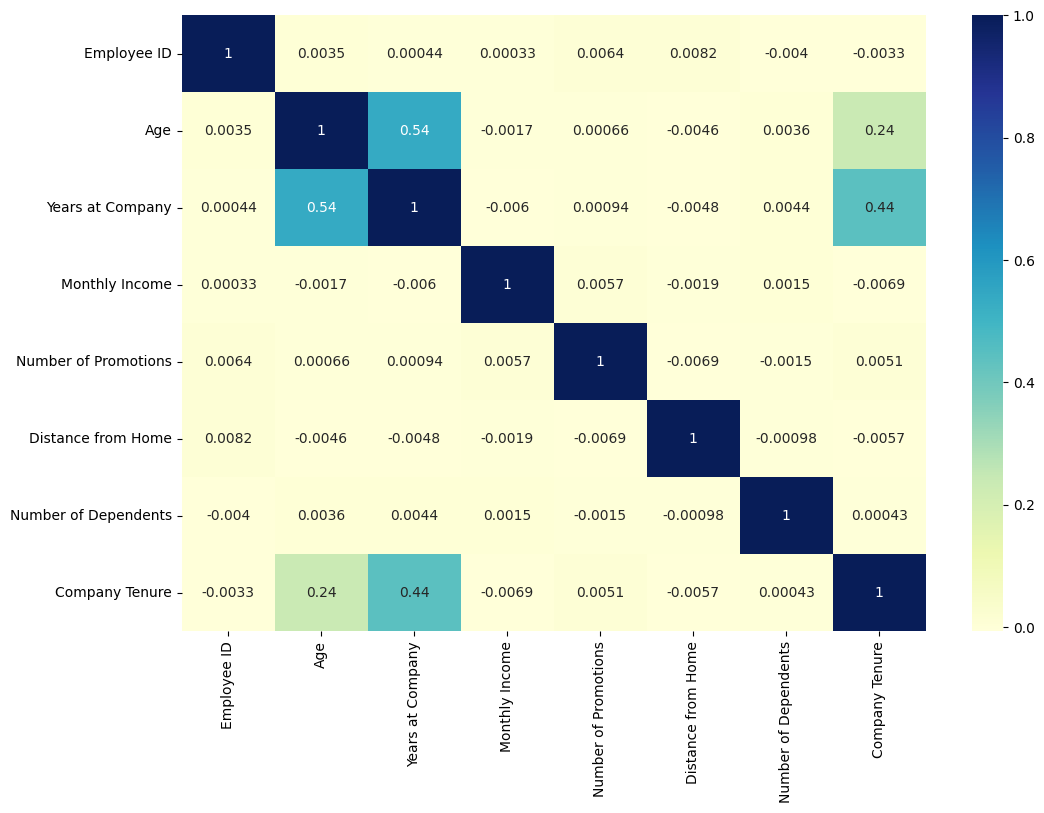

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(('float','int64')).corr(),cmap='YlGnBu',annot=True)
plt.show()

***Here no values are correlated***

##Null Value Imputation

*** We can fill Null values with median on 'Number of Promotions'and 'Number of Dependents'.All others are categorical we can fill with mode***

In [60]:
df['Number of Promotions']=df['Number of Promotions'].fillna(df['Number of Promotions'].median())
df['Number of Dependents']=df['Number of Dependents'].fillna(df['Number of Dependents'].median())
columns=['Work-Life Balance','Performance Rating','Education Level','Marital Status','Job Level','Company Size','Remote Work','Employee Recognition']
for i in columns:
  df[i]=df[i].fillna(df[i].mode().iloc[0])

Again check for null values

In [61]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

***There are no null values***

##Outlier Detection and Clipping

***Outiliers are present in 'Years at Company' and 'Monthly Income'.***

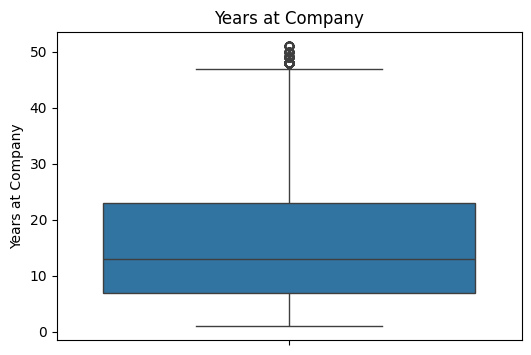

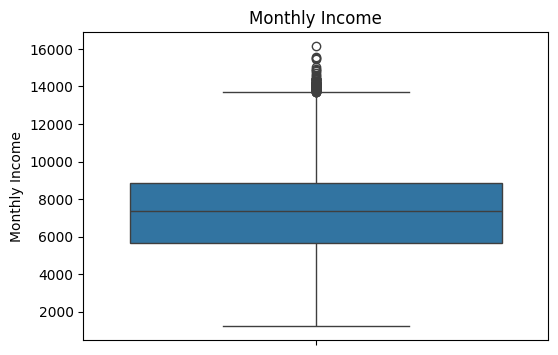

In [62]:
Outlier_columns=['Years at Company', 'Monthly Income']
for i in Outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

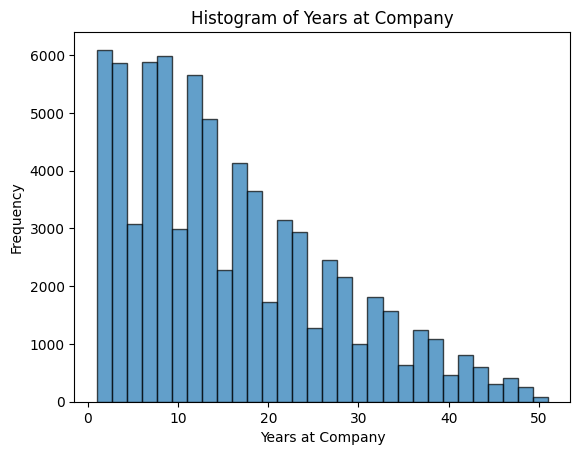

In [63]:
plt.hist(df['Years at Company'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

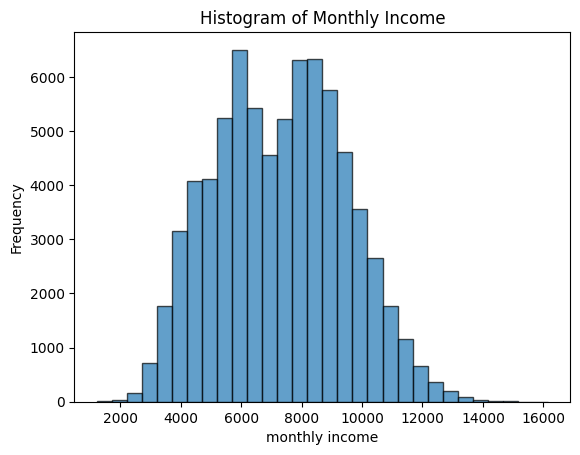

In [64]:
plt.hist(df['Monthly Income'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Monthly Income')
plt.xlabel('monthly income')
plt.ylabel('Frequency')
plt.show()

***These values are skwed so we can use IQR method***

##IQR Method

In [65]:
for i in ['Years at Company', 'Monthly Income']:
    Q1=np.percentile(df[i],25,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    df[i]=df[i].clip(lower=low_lim,upper=up_lim)

Again check for Outliers

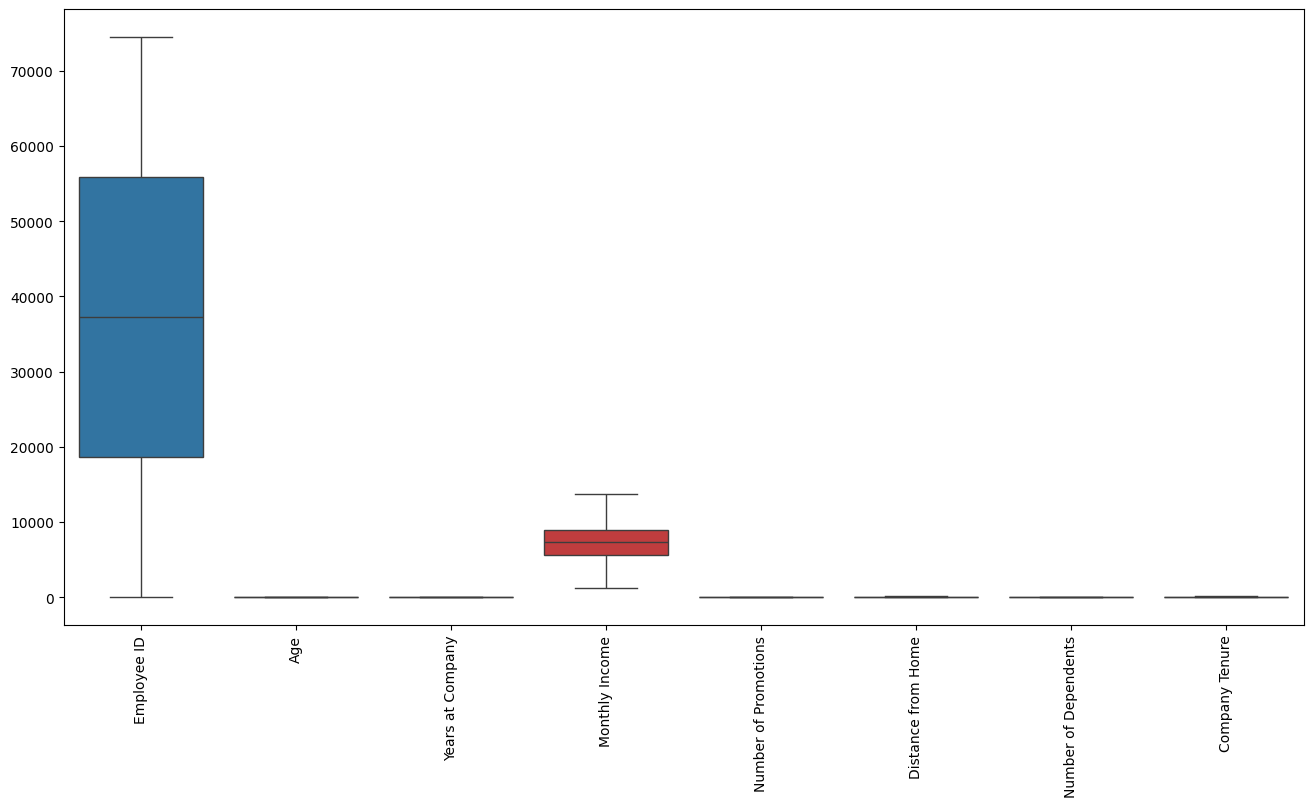

In [66]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***Outliers are removed.***

In [67]:
df.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               47
Job Role                        5
Monthly Income               9778
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

***Employee Id has unique Values so we can make it as index column***

In [68]:
df.set_index('Employee ID',inplace=True)

In [69]:
for column in df.columns:
    print(column,df[column].nunique())

Age 42
Gender 2
Years at Company 47
Job Role 5
Monthly Income 9778
Work-Life Balance 4
Job Satisfaction 4
Performance Rating 4
Number of Promotions 5
Overtime 2
Distance from Home 99
Education Level 5
Marital Status 3
Number of Dependents 7
Job Level 3
Company Size 3
Company Tenure 127
Remote Work 2
Leadership Opportunities 2
Innovation Opportunities 2
Company Reputation 4
Employee Recognition 4
Attrition 2


##Drop Unnecessary Columns

In [70]:
# Drop columns with a 2 unique values
df.drop(['Gender','Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Number of Dependents'],axis=1,inplace=True)

##Encoding

In [74]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for a in ['Job Role','Work-Life Balance','Job Satisfaction','Performance Rating','Company Reputation','Employee Recognition','Job Level','Company Size','Attrition']:
  df[a]=le.fit_transform(df[a])
df.head()

,Age,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Education Level,Marital Status,Job Level,Company Size,Company Tenure,Company Reputation,Employee Recognition,Attrition
Employee ID,,,,,,,,,,,,,,,,,
8410,31,19,0,5390,0,2,0,2.0,22,Associate Degree,1,1,1,89,0,2,1
64756,59,4,3,5534,3,0,3,3.0,21,Master’s Degree,0,1,1,21,1,1,1
30257,24,10,2,8159,2,0,3,0.0,11,Bachelor’s Degree,1,1,1,74,3,1,1
65791,36,7,0,3989,2,0,2,1.0,27,High School,2,1,2,50,2,2,1
65026,56,41,0,4821,1,3,0,0.0,71,High School,0,2,1,68,1,2,1


In [75]:
df.drop('Education Level',axis=1,inplace=True)

In [76]:
df

,Age,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Distance from Home,Marital Status,Job Level,Company Size,Company Tenure,Company Reputation,Employee Recognition,Attrition
Employee ID,,,,,,,,,,,,,,,,
8410,31,19,0,5390,0,2,0,2.0,22,1,1,1,89,0,2,1
64756,59,4,3,5534,3,0,3,3.0,21,0,1,1,21,1,1,1
30257,24,10,2,8159,2,0,3,0.0,11,1,1,1,74,3,1,1
65791,36,7,0,3989,2,0,2,1.0,27,2,1,2,50,2,2,1
65026,56,41,0,4821,1,3,0,0.0,71,0,2,1,68,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16243,56,42,2,7830,3,2,0,0.0,40,2,2,1,60,3,2,1
47175,30,15,0,3856,2,2,0,2.0,45,1,0,1,20,2,2,0
12409,52,5,0,5654,2,3,1,0.0,4,1,1,2,7,2,0,0


##Seperating Target and Independent Variable

In [77]:
x=df.drop('Attrition',axis=1)
y=df['Attrition'].values.reshape(-1,1)

##Train Test Split

In [79]:
y=df['Attrition'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

##Modeling

***Since the data is not imbalanced, we chose k fold cross validation technique.***

In [80]:
kfold_validator=KFold(10,shuffle=True,random_state=42)

##Logistic Regression

In [81]:
log_reg=LogisticRegression()
cv_result_log_reg=cross_val_score(log_reg,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Logistic Regression Model:', cv_result_log_reg.mean())

Average cross validation score of Logistic Regression Model: 0.6666796525763479


##Decision Tree

In [82]:
dt_clf=DecisionTreeClassifier()
cv_result_dt_clf=cross_val_score(dt_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Decision Tree Model:', cv_result_dt_clf.mean())

Average cross validation score of Decision Tree Model: 0.6226318551609522


##Random Forest

In [83]:
rf_clf=RandomForestClassifier()
cv_result_rf=cross_val_score(rf_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Random Forest Model:', cv_result_rf.mean())

Average cross validation score of Random Forest Model: 0.7060484108534402


##KNN

In [84]:
knn=KNeighborsClassifier()
cv_result_knn=cross_val_score(knn,x_train.values,y_train,cv=kfold_validator)
print('Average cross validation score of KNN Model:', cv_result_knn.mean())

Average cross validation score of KNN Model: 0.5206909526347128


##Modeling With Scaling

In [99]:
# Assuming 'X' contains your features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [100]:
y=df['Attrition'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42,test_size=0.3)

In [105]:
log_reg=LogisticRegression()
cv_result_log_reg_sc=cross_val_score(log_reg,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Logistic Regression Model:', cv_result_log_reg.mean())

Average cross validation score of Logistic Regression Model: 0.6765169738086227


In [106]:
dt_clf=DecisionTreeClassifier()
cv_result_dt_clf_sc=cross_val_score(dt_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Decision Tree Model:', cv_result_dt_clf.mean())

Average cross validation score of Decision Tree Model: 0.6233987336255622


In [107]:
rf_clf=RandomForestClassifier()
cv_result_rf_sc=cross_val_score(rf_clf,x_train,y_train,cv=kfold_validator)
print('Average cross validation score of Random Forest Model:', cv_result_rf.mean())

Average cross validation score of Random Forest Model: 0.7051662994497078


In [108]:
model=['Logistic Regression','Decision Tree','Random Forest','KNN']
comp_table= pd.DataFrame([[cv_result_log_reg.mean()],[cv_result_dt_clf.mean()],[cv_result_rf.mean()],[cv_result_knn.mean()]],columns=['Average Cross Validation Score'])
comp_table.index=model
comp_table

,Average Cross Validation Score
Logistic Regression,0.676517
Decision Tree,0.623399
Random Forest,0.705166
KNN,0.520691


##Average cross validation score is high for Random forest so taking it for prediction

In [111]:
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

In [112]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[rf_clf.score(x_train,y_train)],[accuracy_score(y_test,rf_pred)],[precision_score(y_test,rf_pred)],[recall_score(y_test,rf_pred)],[f1_score(y_test,rf_pred)]],columns=['Random Forest'])
table.index=metric
table

,Random Forest
Train Accuracy,1.000000
Test Accuracy,0.712349
Precision,0.721283
Recall,0.733316
F1 Score,0.727250


***Ranadom Forest Accuracy is .712.Model is good***